<a href="https://colab.research.google.com/github/SergioMoraa/RedClima/blob/main/Prediccion_del_clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# entrenamiento_modelo_temp.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

# Cargar dataset (puedes reemplazar esto por tus propios datos)
# Simularemos 500 muestras
np.random.seed(0)
hora = np.random.randint(0, 24, 500)
humedad = np.random.uniform(30, 90, 500)
presion = np.random.uniform(980, 1030, 500)
temp_actual = np.random.uniform(10, 30, 500)

# Variable objetivo: temperatura futura
temp_futura = temp_actual + np.random.normal(0, 1.5, 500) + 0.1 * (humedad - 60) - 0.05 * (presion - 1000)

df = pd.DataFrame({
    "hora": hora,
    "humedad": humedad,
    "presion": presion,
    "temp_actual": temp_actual,
    "temp_futura": temp_futura
})

# Separar entradas y salidas
X = df[["hora", "humedad", "presion", "temp_actual"]].values
y = df["temp_futura"].values

# Normalización
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Definir modelo MLP
model = tf.keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

# Guardar modelo estándar
model.save("modelo_pred_temp.h5")

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 405.9051 - mae: 19.1915 - val_loss: 405.3387 - val_mae: 19.2983
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 391.6245 - mae: 18.8628 - val_loss: 390.8385 - val_mae: 18.9194
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 406.4445 - mae: 19.2248 - val_loss: 367.2802 - val_mae: 18.2885
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 368.6840 - mae: 18.1543 - val_loss: 337.2635 - val_mae: 17.4537
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 341.3946 - mae: 17.4159 - val_loss: 301.3796 - val_mae: 16.3978
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 296.7273 - mae: 16.1998 - val_loss: 258.1547 - val_mae: 15.0335
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 262.7018 - mae: 15.0584 - val_loss: 209.4963 - val_mae: 13.3238
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 191.0560 - mae: 12.5375 - val_loss: 159.3916 - val_mae: 11.2851
Epoch 9/1

In [5]:
# convertir_tflite_micro.py

import tensorflow as tf

# Cargar modelo Keras entrenado
model = tf.keras.models.load_model("modelo_pred_temp.h5", custom_objects={"mse": tf.keras.losses.mean_squared_error}, compile=False)

# Convertir a TFLite sin cuantización
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar archivo .tflite
with open("modelo_pred_temp.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpw1jemwbb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137020835065552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137020835062096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137020835066896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137020835065744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137020835064400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137020835065360: TensorSpec(shape=(), dtype=tf.resource, name=None)


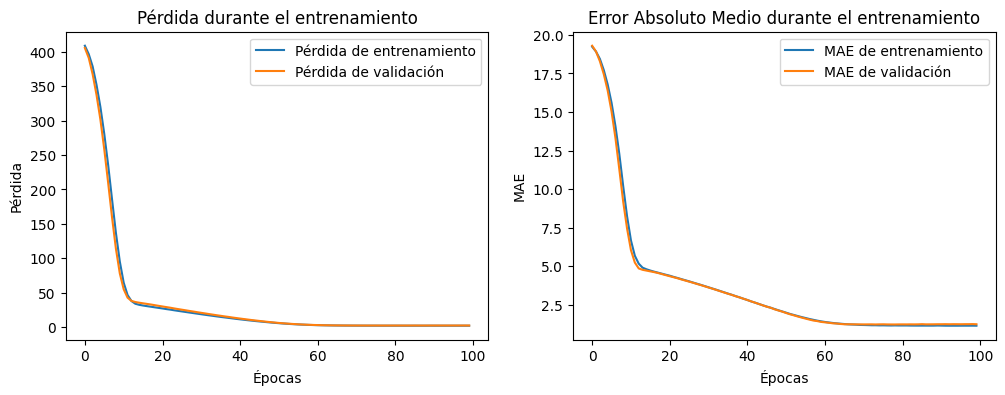

In [9]:
import matplotlib.pyplot as plt

# Graficar la pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar el error absoluto medio
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.title('Error Absoluto Medio durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.show()